# Health Insurance Cross Sell
The cllient is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. This dataset can be found on [Kaggle](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction).

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

# Problems
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

# Goals
Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# 1) Preparation of Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
insurance = pd.read_csv("/content/drive/My Drive/Datasets/healt_insurance_cross_sell.csv")
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#2) Explaination of Each Column

In [ ]:
desc       = ["Unique ID for the customer.",
              "Gender of the customer.",
              "Age of the customer.",
              "0: Doesn't have DL, 1: have DL.",
              "Unique code for the region of the customer.",
              "1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance.",
              "Age of the Vehicle.",
              "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.",
              "The amount customer needs to pay as premium in the year.",
              "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.",
              "Number of Days, Customer has been associated with the company.",
              "1 : Customer is interested, 0 : Customer is not interested."]

insurance_desc = []
j = 0
for column in insurance.columns:
  insurance_desc.append(
      [
       column,
       insurance[column].dtypes,
       insurance[column].isnull().sum(),
       round(insurance[column].isnull().sum()/len(insurance)*100, 2),
       insurance[column].nunique(),
       insurance[column].unique(),
       desc[j]
       ]
       )
  j += 1

column_desc = pd.DataFrame(insurance_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(insurance.columns)} columns.")

Total column of this data set is: 12 columns.


In [ ]:
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,id,int64,0,0.0,381109,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",Unique ID for the customer.
1,Gender,object,0,0.0,2,"[Male, Female]",Gender of the customer.
2,Age,int64,0,0.0,66,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...",Age of the customer.
3,Driving_License,int64,0,0.0,2,"[1, 0]","0: Doesn't have DL, 1: have DL."
4,Region_Code,float64,0,0.0,53,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...",Unique code for the region of the customer.
5,Previously_Insured,int64,0,0.0,2,"[0, 1]","1 : Customer already has Vehicle Insurance, 0 ..."
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year, < 1 Year]",Age of the Vehicle.
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]",1 : Customer got his/her vehicle damaged in th...
8,Annual_Premium,float64,0,0.0,48838,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...",The amount customer needs to pay as premium in...
9,Policy_Sales_Channel,float64,0,0.0,155,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...",Anonymized Code for the channel of outreaching...


# 3) Handling Missing Value
There is no missing value, so we go to the next step.

#4) Outliers

In [ ]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

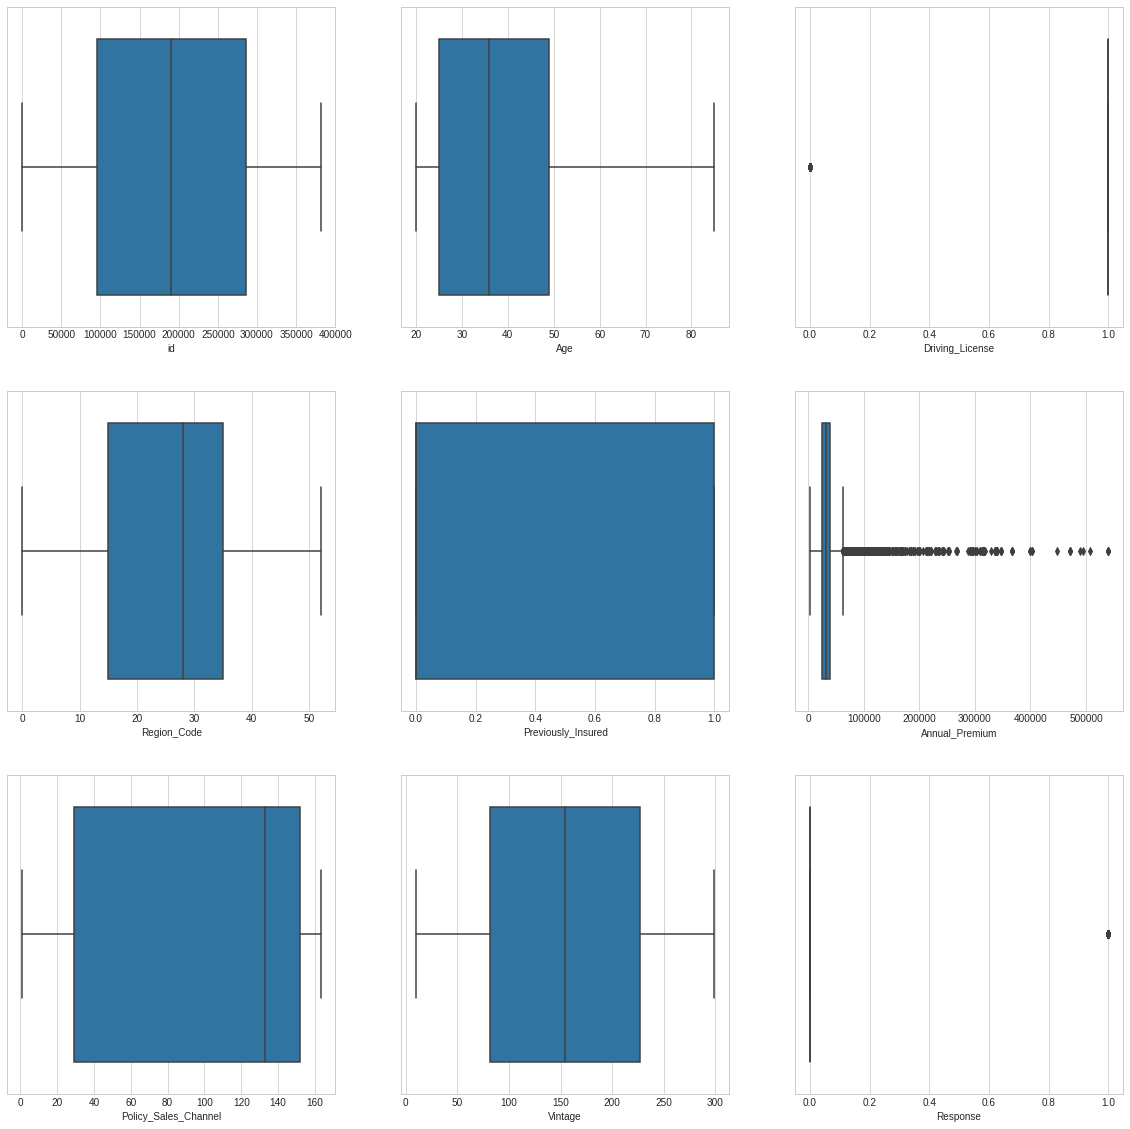

In [ ]:
plt.figure(figsize = (20,20))

n = 1
for name in insurance.describe().columns:
  plt.subplot(3,3,n)
  sns.boxplot(insurance[name])
  n += 1

plt.style.use('seaborn-whitegrid')
plt.show()

## Driving_License, Response
Since this is only '1' and '0', we will keep all these data.

 ## Annual_Premium

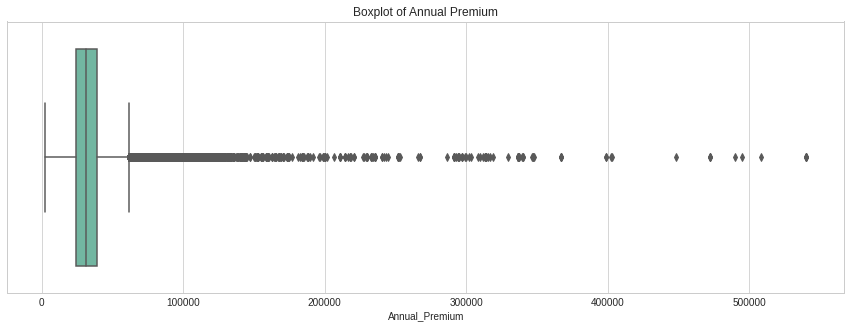

In [ ]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Annual_Premium', data = insurance, palette = 'Set2')
plt.title('Boxplot of Annual Premium')
plt.show()

In [ ]:
Q1_ap = insurance.describe()['Annual_Premium']['25%']
Q3_ap = insurance.describe()['Annual_Premium']['75%']
IQR_ap = Q3_ap - Q1_ap
UpFence_ap = Q3_ap + (1.5 * IQR_ap)
LoFence_ap = Q1_ap - (1.5 * IQR_ap)

insurance[(insurance['Annual_Premium'] < LoFence_ap) | (insurance['Annual_Premium'] > UpFence_ap)].sort_values(by = 'Annual_Premium')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
112685,112686,Male,45,1,7.0,0,1-2 Year,Yes,61893.0,124.0,132,0
81886,81887,Male,23,1,28.0,0,< 1 Year,Yes,61893.0,152.0,128,1
43505,43506,Female,70,1,28.0,1,1-2 Year,No,61893.0,26.0,195,0
249017,249018,Female,25,1,28.0,1,< 1 Year,No,61893.0,152.0,17,0
167151,167152,Male,44,1,28.0,0,> 2 Years,Yes,61893.0,25.0,184,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11319,11320,Female,50,1,46.0,1,1-2 Year,No,508073.0,26.0,192,0
190154,190155,Male,47,1,28.0,0,1-2 Year,Yes,540165.0,42.0,24,0
268332,268333,Male,46,1,28.0,0,1-2 Year,Yes,540165.0,124.0,59,0
54743,54744,Male,26,1,28.0,0,< 1 Year,Yes,540165.0,156.0,245,1


In [ ]:
print(f"Outliers of Annual_Premium column is above {UpFence_ap} .")
print(f"Total data which counted as an outliers is {len(insurance[(insurance['Annual_Premium'] < LoFence_ap) | (insurance['Annual_Premium'] > UpFence_ap)].sort_values(by = 'Annual_Premium'))} of {len(insurance)} rows.")
print(f"It's{(len(insurance[(insurance['Annual_Premium'] < LoFence_ap) | (insurance['Annual_Premium'] > UpFence_ap)]) ) / len(insurance) * 100 : .2f}% from the entire rows.")

Outliers of Annual_Premium column is above 61892.5 .
Total data which counted as an outliers is 10320 of 381109 rows.
It's 2.71% from the entire rows.


In [ ]:
# # ONLY RUN ONCE!

# outliers = (insurance['Annual_Premium'] < LoFence_ap) | (insurance['Annual_Premium'] > UpFence_ap)

# print(f"There are {len(insurance)} rows before dropping outliers from Annual_Premium column.")
# print(f"Dropping outliers ....")

# insurance.drop(insurance[outliers].index, inplace = True)

# print(f"There are {len(insurance)} rows after dropping outliers from Annual_Premium column.")

In [ ]:
# plt.figure(figsize = (15,5))
# sns.boxplot(x = 'Annual_Premium', data = insurance, palette = 'Set2')
# plt.title('Boxplot of Annual Premium After Dropping Outliers')
# plt.show()

#6) Descriptive Analysis

In [ ]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [ ]:
insurance.describe(include = 'O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


## Univariate

In [ ]:
!pip install sidetable
import sidetable

insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
insurance.stb.freq(['Gender'], cum_cols = False)

# With 54%, Male customers are dominating the insurance sales.

,Gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


In [ ]:
# TOP 10 CUSTOMERS INSURANCE SALES by AGE

insurance.stb.freq(['Age'], cum_cols = False).head(10)

# Most customers are 20s years old, between 21-28 years old
# Beside that, there are customer which 43 and 44 years old

,Age,count,percent
0,24,25960,6.811700
1,23,24256,6.364583
2,22,20964,5.500788
3,25,20636,5.414724
4,21,16457,4.318187
5,26,13535,3.551477
6,27,10760,2.823339
7,28,8974,2.354707
8,43,8437,2.213802
9,44,8357,2.192811


In [ ]:
insurance.stb.freq(['Driving_License'], cum_cols = False)

# 99,8% customers have their driving license

,Driving_License,count,percent
0,1,380297,99.786938
1,0,812,0.213062


In [ ]:
insurance.stb.freq(['Region_Code'], cum_cols = False).head()

# TOP 5 REGION INSURANCE SALES
# Region Code '28' dominates insurance sales

,Region_Code,count,percent
0,28.0,106415,27.922458
1,8.0,33877,8.889058
2,46.0,19749,5.181982
3,41.0,18263,4.792067
4,15.0,13308,3.491914


In [ ]:
insurance.stb.freq(['Previously_Insured'], cum_cols = False)

# 54% customers already has Vehicle Insurance.

,Previously_Insured,count,percent
0,0,206481,54.178988
1,1,174628,45.821012


In [ ]:
insurance.stb.freq(['Vehicle_Age'], cum_cols = False)

# We see that 95.9% customers' vehicle is new within 2 years of its age.

,Vehicle_Age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


In [ ]:
insurance.stb.freq(['Vehicle_Damage'], cum_cols = False)

# There are 50.3% customers ever got his/her vehicle damaged in the past

,Vehicle_Damage,count,percent
0,Yes,192413,50.487656
1,No,188696,49.512344


In [ ]:
insurance.stb.freq(['Annual_Premium'], cum_cols = False).head()

# 17.5% customers have their annual premium with Rs 2630 .

,Annual_Premium,count,percent
0,2630.0,64877,17.023214
1,69856.0,140,0.036735
2,39008.0,41,0.010758
3,45179.0,38,0.009971
4,38287.0,38,0.009971


In [ ]:
insurance.stb.freq(['Policy_Sales_Channel'], cum_cols = False).head()

# 35% customers were reached by Policy Sales Channel no. 152

# Anonymized Code for the channel of outreaching to the customer ie. 
# Different Agents, Over Mail, Over Phone, In Person, etc.

,Policy_Sales_Channel,count,percent
0,152.0,134784,35.366260
1,26.0,79700,20.912652
2,124.0,73995,19.415705
3,160.0,21779,5.714638
4,156.0,10661,2.797362


In [ ]:
insurance.stb.freq(['Vintage'], cum_cols = False).head()

# Most customers has been associated with the insurance company with 256 days or about 8 months.
# Number of Days, Customer has been associated with the company.

,Vintage,count,percent
0,256,1418,0.372072
1,73,1410,0.369973
2,282,1397,0.366562
3,158,1394,0.365775
4,187,1392,0.365250


In [ ]:
insurance.stb.freq(['Response'], cum_cols = False)

# 88% customers are not interested with vehicle insurance.

,Response,count,percent
0,0,334399,87.743664
1,1,46710,12.256336


## Multivariate

In [ ]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
(pd.crosstab(insurance['Response'], insurance['Gender'], normalize = 'columns')*100).round(2)

# 10% female customers are interest with vehicle insurance.
# 14% male customers are interest with vehicle insurance

Gender,Female,Male
Response,,
0,89.61,86.16
1,10.39,13.84


In [ ]:
(pd.crosstab(insurance['Response'], insurance['Gender'], normalize = 'index')*100).round(2)

# 39% customers who interest with vehicle insurance are Female, 61% customers are Male

Gender,Female,Male
Response,,
0,46.90,53.10
1,38.93,61.07


In [ ]:
(pd.crosstab(insurance['Response'], insurance['Driving_License'], normalize = 'columns')*100).round(2)

# 12% Customers who have driving license are interest with vehicle insurance

Driving_License,0,1
Response,,
0,94.95,87.73
1,5.05,12.27


In [ ]:
(pd.crosstab(insurance['Response'], insurance['Previously_Insured'], normalize = 'columns')*100).round(2)

# 78% customers who have not been previously insured are likely not interest with vehicle insurance
# Customers who have been previously insured are likely not interest with company's offering about vehicle insurance,
  # this is make sense since its percentage is 99.9%.

Previously_Insured,0,1
Response,,
0,77.45,99.91
1,22.55,0.09


In [ ]:
(pd.crosstab(insurance['Response'], insurance['Vehicle_Damage'], normalize = 'columns')*100).round(2)

# Even 76% customers who got his/her car damaged in the past are likely not interest with vehicle insurance
# Only 24% customers who got his/her car damaged in the past are likely interest with vehicle insurance
# 99,5% customers who don't got his/her car damaged in the past are not interest with vehicle insurance.

Vehicle_Damage,No,Yes
Response,,
0,99.48,76.23
1,0.52,23.77


In [ ]:
(pd.crosstab(insurance['Response'], insurance['Vehicle_Age'], normalize = 'columns')*100).round(2)

# No matter how many age their vehicle, customers tend to not interest with vehicle insurance.

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,82.62,95.63,70.63
1,17.38,4.37,29.37


In [ ]:
(pd.crosstab(insurance['Response'], insurance['Vehicle_Damage'], insurance['Annual_Premium'], aggfunc = 'mean')*1).round(2)

# Customers who got his/her car damaged in the past have the average annual premium about Rs 30149
# Customers who are not got his/her car damaged in the past have the average annual premium about Rs 23199

Vehicle_Damage,No,Yes
Response,,
0,30435.02,30398.86
1,24067.03,31765.95


In [ ]:
(pd.crosstab(insurance['Response'], insurance['Previously_Insured'], insurance['Annual_Premium'], aggfunc = 'mean', normalize = 'columns')*100).round(2)

# Customers who already have vehicle insurance, have a higher premium on 'not interest' with 53% rather than on 'interest' with 47%

Previously_Insured,0,1
Response,,
0,48.83,53.26
1,51.17,46.74


In [ ]:
(pd.crosstab(insurance['Age'], insurance['Vehicle_Damage'], insurance['Annual_Premium'], aggfunc = 'mean')*1).round(2).sort_values(by = 'Yes', ascending = False)

# we see that customer who has senior age and ever had a vehicle damage in the past tend to pay higher premium than the younger customer

Vehicle_Damage,No,Yes
Age,,
84,32635.44,48065.00
83,25374.00,37779.20
82,38870.69,36271.15
77,34162.33,35375.69
71,34139.49,35371.88
...,...,...
33,27548.51,26358.47
30,28967.01,26195.88
32,27572.53,26184.55


In [ ]:
insurance.groupby('Age').mean()[['Annual_Premium', 'Vintage']].sort_values('Annual_Premium', ascending = False).head(10)

# it's obvious that most customers who already senior tend to have bigger annual premium within 5 months has been associated with the compnay

,Annual_Premium,Vintage
Age,,
82,37705.379310,162.862069
84,35440.818182,138.636364
77,34903.633285,154.175793
71,34868.950268,154.216967
75,34746.913396,157.244860
78,34681.101974,152.977796
76,34640.320201,150.194126
72,34403.468796,154.739066
73,34284.349610,153.441039


In [ ]:
insurance.groupby('Age').mean()[['Annual_Premium', 'Vintage']].sort_values('Vintage', ascending = False).head(10)

# Most customers who already senior tend to have longer days which has been associated with the compnay

,Annual_Premium,Vintage
Age,,
81,31201.571429,172.535714
82,37705.379310,162.862069
85,29792.363636,160.454545
83,31012.727273,159.545455
75,34746.913396,157.244860
68,33179.472951,157.164754
66,33610.774679,156.882202
62,32800.759021,156.748067
27,29109.687825,156.466078


In [ ]:
insurance.groupby('Vehicle_Age').mean()['Annual_Premium'].round(2)

# Customers who have their vehicle age more than 2 years, have the highest annual premium with Rs 33104

Vehicle_Age
1-2 Year     30523.58
< 1 Year     30119.55
> 2 Years    35654.50
Name: Annual_Premium, dtype: float64

In [ ]:
insurance.groupby('Gender').mean()['Annual_Premium'].round(2)

# Both Male and Female have the almost same amount of annual premium

Gender
Female    30495.79
Male      30622.65
Name: Annual_Premium, dtype: float64

In [ ]:
insurance.groupby('Vehicle_Damage').mean()['Annual_Premium'].round(2)

# Both customers who have been and have been not got damaged in the past, have the almost same amount of annual premium

Vehicle_Damage
No     30401.88
Yes    30723.76
Name: Annual_Premium, dtype: float64

#7) Data Visualization

## Univariate

In [ ]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


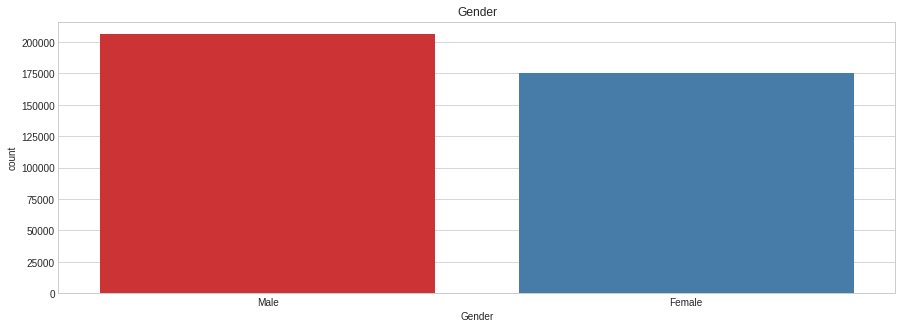

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(insurance['Gender'], palette='Set1')
plt.title("Gender")
plt.show()

plt.style.use('seaborn-whitegrid')

# With 54%, Male customers are dominating the insurance sales.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


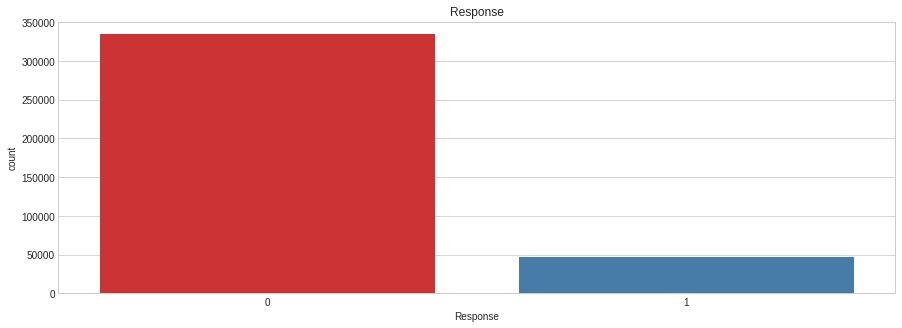

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(insurance['Response'], palette='Set1')
plt.title("Response")
plt.show()

plt.style.use('seaborn-whitegrid')

# 88% customers are not interested with vehicle insurance.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


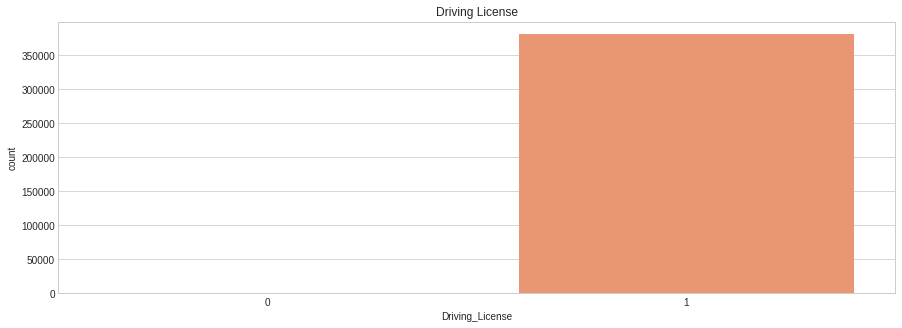

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(insurance['Driving_License'], palette='Set2')
plt.title("Driving License")
plt.show()

plt.style.use('seaborn-whitegrid')

# 99,8% customers have their driving license

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


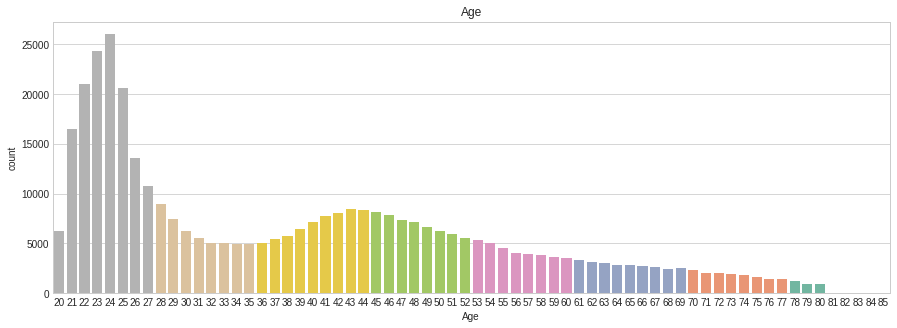

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(insurance['Age'], palette='Set2_r')
plt.title("Age")
plt.show()

plt.style.use('seaborn-whitegrid')

# we see that insurance's customer is dominated by the young adult age between 20 until 30 years old.
# but we see that the trend is going up and reach the second peak, in 37 until 43 years old.
# The awareness of insurance likely dominated by Young Adult since the era of information is boosting up.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


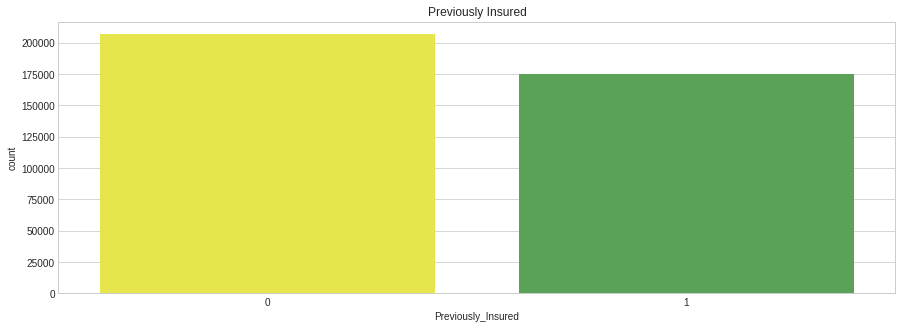

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(insurance['Previously_Insured'], palette='Set1_r')
plt.title("Previously Insured")
plt.show()

plt.style.use('seaborn-whitegrid')

# 54% customers already has Vehicle Insurance.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


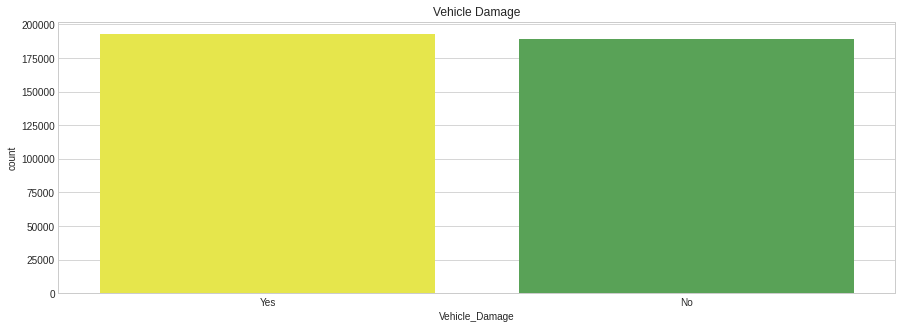

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(insurance['Vehicle_Damage'], palette='Set1_r')
plt.title("Vehicle Damage")
plt.show()

plt.style.use('seaborn-whitegrid')

# There are 50.3% customers ever got his/her vehicle damaged in the past

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


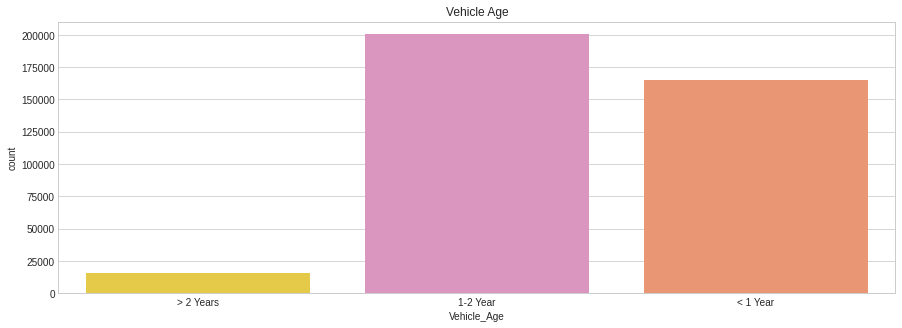

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(insurance['Vehicle_Age'], palette='Set2_r')
plt.title("Vehicle Age")
plt.show()

plt.style.use('seaborn-whitegrid')

# We see that 95.9% customers' vehicle is new within 2 years of its age.

## Multivariate

In [ ]:
insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Annual Premium

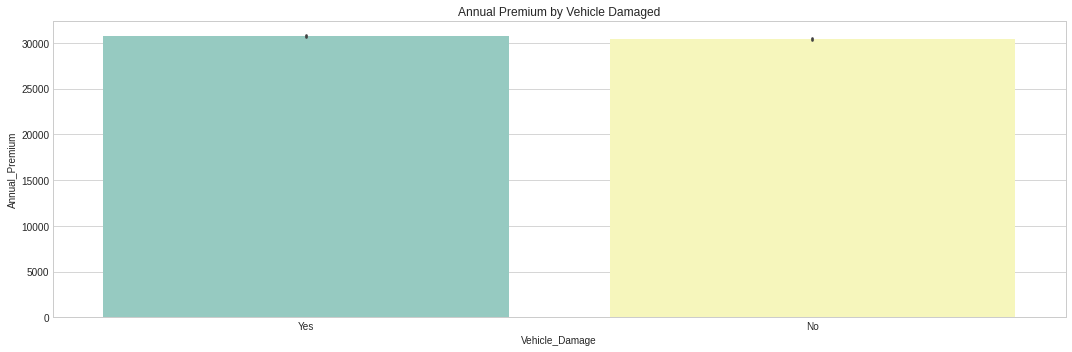

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(data = insurance, x = 'Vehicle_Damage', y = 'Annual_Premium', palette = 'Set3')
plt.title("Annual Premium by Vehicle Damaged")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Customer who had already faced vehicle damage in the past, has a higher annual premium than who have not faced damage.

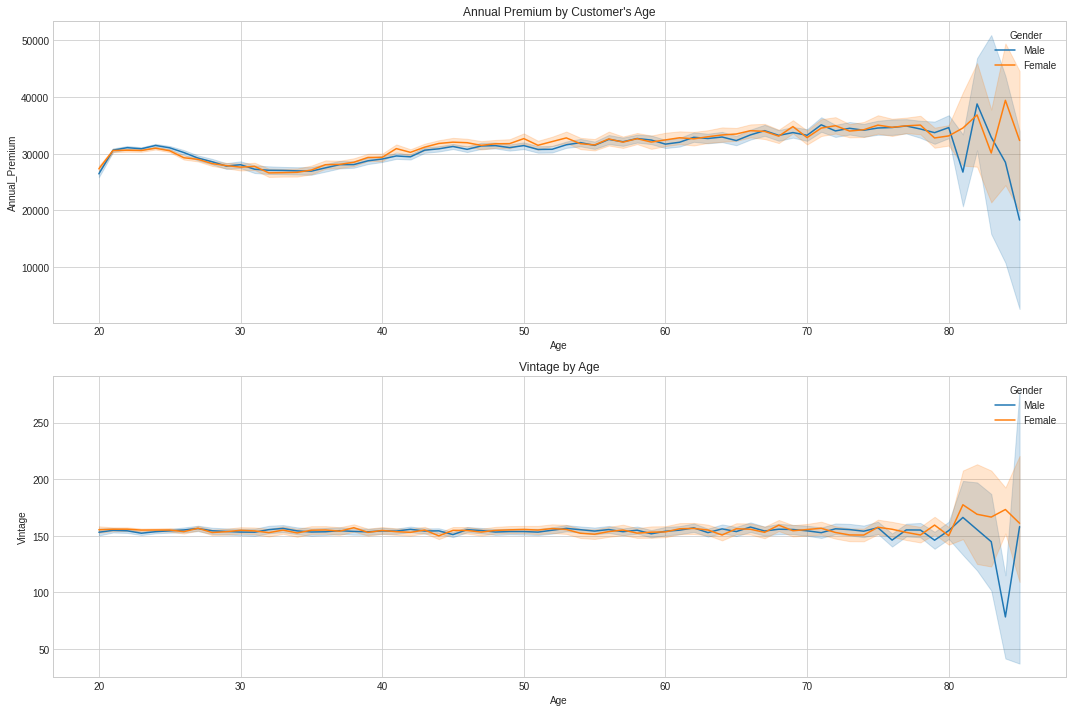

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.lineplot(data = insurance, x = 'Age', y = 'Annual_Premium', hue = 'Gender')
plt.title("Annual Premium by Customer's Age")
# Customer who already lives more than 80 years has a higher annual premium both male and female

plt.subplot(2,1,2)
sns.lineplot(data = insurance, x = 'Age', y = 'Vintage', hue = 'Gender')
plt.title("Vintage by Age")
# The average of Number of Days (vintage) Customer has been associated with the company is about 150 days or 5 months

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

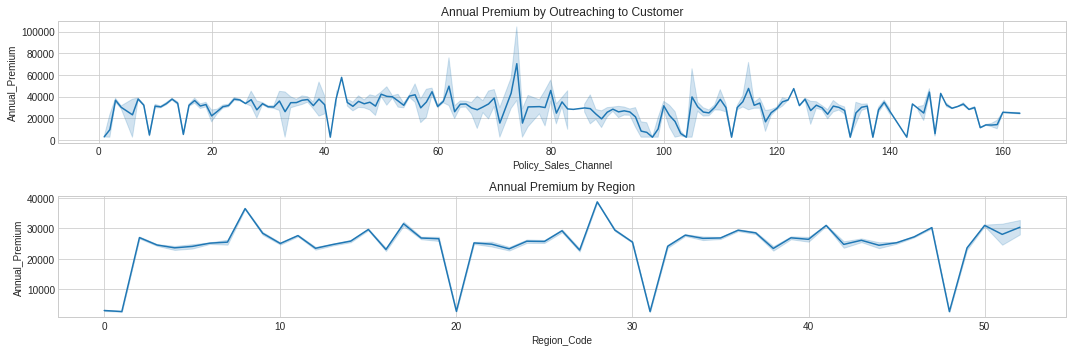

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(2,1,1)
sns.lineplot(data = insurance, x = 'Policy_Sales_Channel', y = 'Annual_Premium')
plt.title("Annual Premium by Outreaching to Customer")
# Insurance company's agent who the highest annual premium is about code 70.

plt.subplot(2,1,2)
sns.lineplot(data = insurance, x = 'Region_Code', y = 'Annual_Premium')
plt.title("Annual Premium by Region")
# Customer with region code about 30 is the highest annual premium in the insurance company

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()



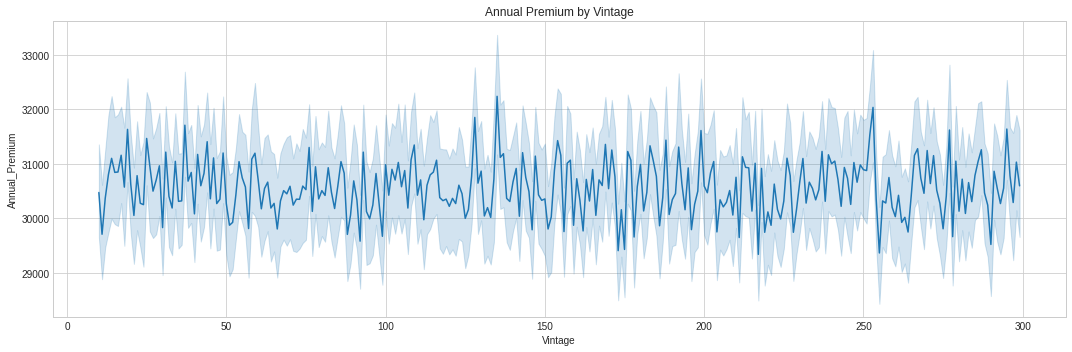

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(data = insurance, x = 'Vintage', y = 'Annual_Premium')
plt.title("Annual Premium by Vintage")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

# Annual Premium is tend to same with the average of all customers

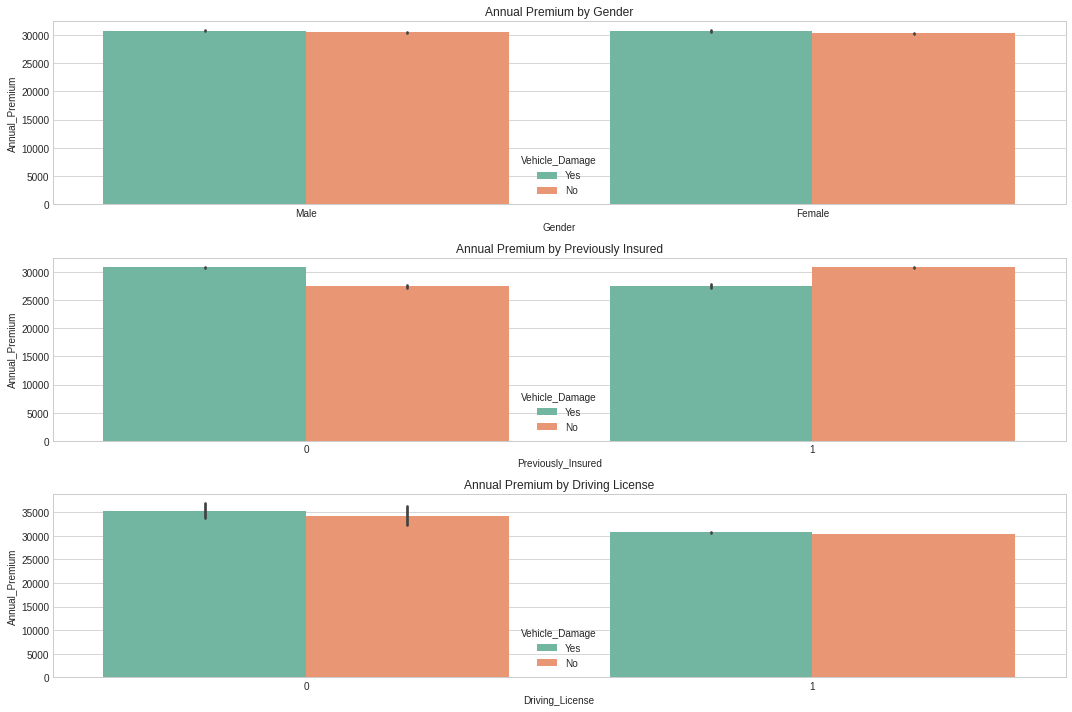

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
sns.barplot(data = insurance, x = 'Gender', y = 'Annual_Premium', palette = 'Set2', hue = 'Vehicle_Damage')
plt.title("Annual Premium by Gender")

plt.subplot(3,1,2)
sns.barplot(data = insurance, x = 'Previously_Insured', y = 'Annual_Premium', palette = 'Set2', hue = 'Vehicle_Damage')
plt.title("Annual Premium by Previously Insured")

plt.subplot(3,1,3)
sns.barplot(data = insurance, x = 'Driving_License', y = 'Annual_Premium', palette = 'Set2', hue = 'Vehicle_Damage')
plt.title("Annual Premium by Driving License")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

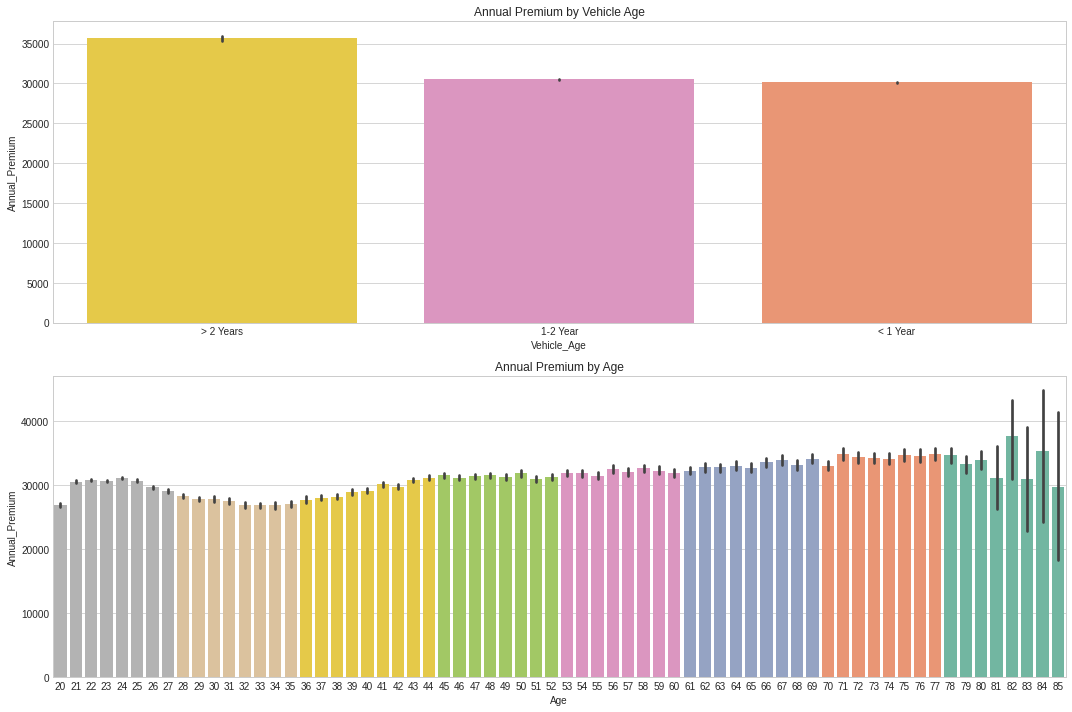

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.barplot(data = insurance, x = 'Vehicle_Age', y = 'Annual_Premium', palette = 'Set2_r')
plt.title("Annual Premium by Vehicle Age")

plt.subplot(2,1,2)
sns.barplot(data = insurance, x = 'Age', y = 'Annual_Premium', palette = 'Set2_r')
plt.title("Annual Premium by Age")

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

### Vehicle Damage

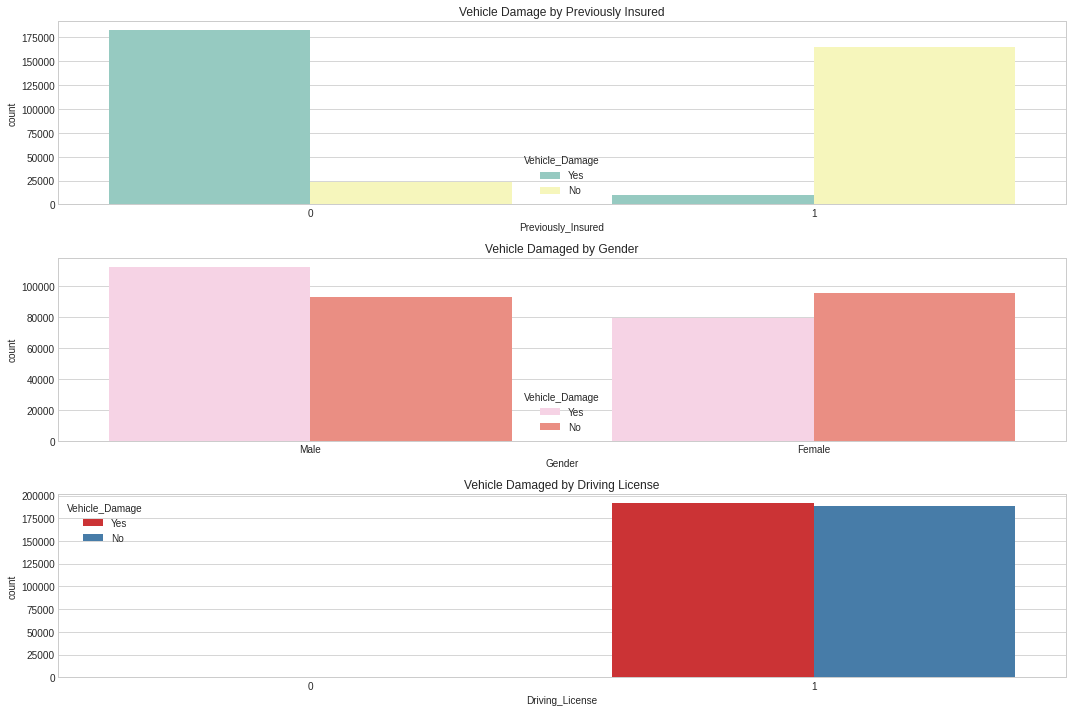

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
sns.countplot(data = insurance, x = 'Previously_Insured', palette = 'Set3', hue = 'Vehicle_Damage')
plt.title("Vehicle Damage by Previously Insured")
# Most customer who has not vehicle insurance, has faced vehicle damage in the past compare to they who don't
# This is a good news that we have a market who dont have vehicle insurance yet.
# In other hand, most customer who has vehicle insurance, has not faced vehicle damage in the past.

plt.subplot(3,1,2)
sns.countplot(data = insurance, x = 'Gender', palette = 'Set3_r', hue = 'Vehicle_Damage')
plt.title("Vehicle Damaged by Gender")
# Customer who has vehicle damage in the past is dominated by male than female

plt.subplot(3,1,3)
sns.countplot(data = insurance, x = 'Driving_License', palette = 'Set1', hue = 'Vehicle_Damage')
plt.title("Vehicle Damaged by Driving License")
# There are customer who has driving license ever faced vehicle damage and never face it before.

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

### Response

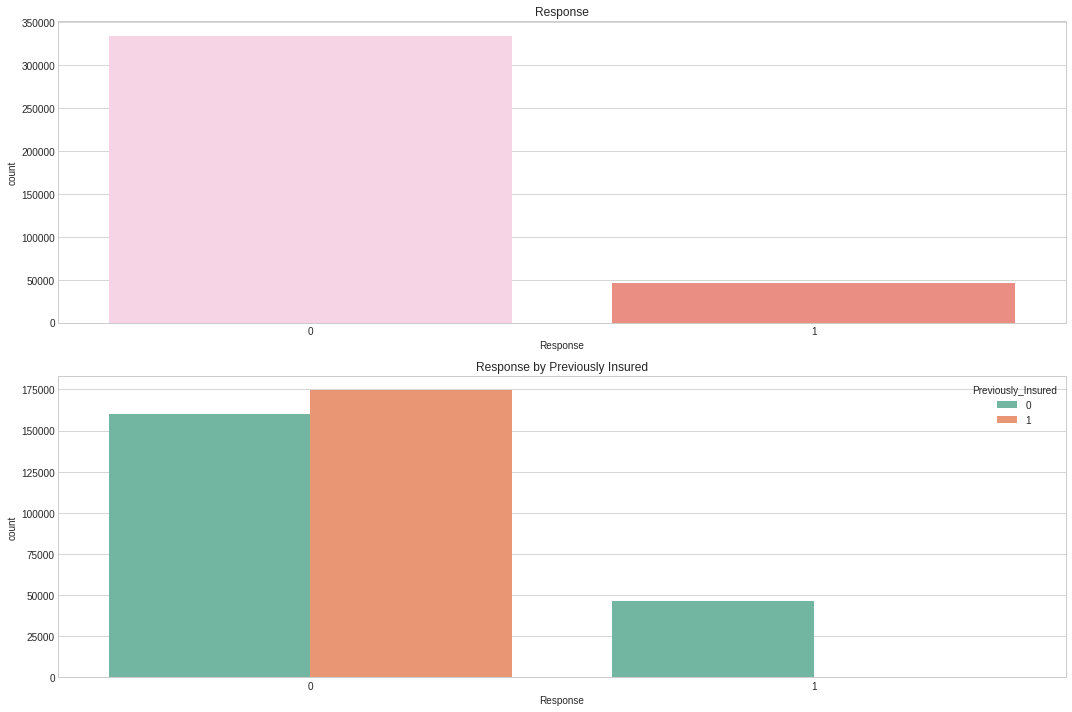

In [172]:
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.countplot(data = insurance, x = 'Response', palette = 'Set3_r')
plt.title("Response")
# Most customer tend to not interested in vehicle insurance. Why?

plt.subplot(2,1,2)
sns.countplot(data = insurance, x = 'Response', palette = 'Set2', hue = 'Previously_Insured')
plt.title("Response by Previously Insured")
# We see that all customer who has vehicle insurance are not interested at all. That's make sense since they already have one.
# But in the other hand, there are still few customer who has not vehicle insurance but interested with our vehicle insurance.
# We can't pessimist now, the future is bright

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [171]:
(pd.crosstab(insurance['Response'], insurance['Previously_Insured'], normalize = 'index')*100).round(2)
# Customers who said no interest, 52% of them are not interested not because they don't want but because they already have.
# And Customers who said interested 99.66% of them said they don't have vehicle insurance.
# This means that we still have a chance that our vehicle insurance still interested by many people. The future is bright!

Previously_Insured,0,1
Response,,
0,47.83,52.17
1,99.66,0.34


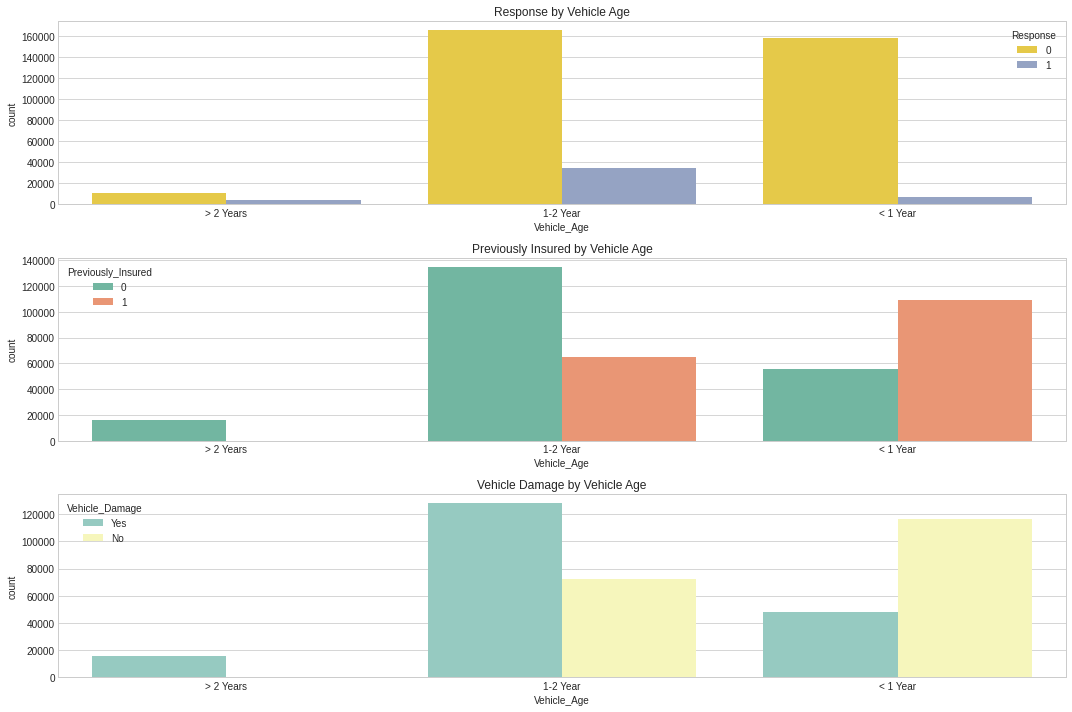

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(3,1,1)
sns.countplot(data = insurance, x = 'Vehicle_Age', palette = 'Set2_r', hue = 'Response')
plt.title("Response by Vehicle Age")
# Most Customer who has vehicle less than 2 years are not interested with vehicle insurance. Why?

plt.subplot(3,1,2)
sns.countplot(data = insurance, x = 'Vehicle_Age', palette = 'Set2', hue = 'Previously_Insured')
plt.title("Previously Insured by Vehicle Age")
# See the peach bar? We see that customer who has vehicle less than a year is already has their vehicle insurance.
# But, the bright side is there still a market for us especially customer who has vehicle 1 and/or more than 2 years old

plt.subplot(3,1,3)
sns.countplot(data = insurance, x = 'Vehicle_Age', palette = 'Set3', hue = 'Vehicle_Damage')
plt.title("Vehicle Damage by Vehicle Age")
# We see the same form of bar chart like previous chart.
# Customer who has not vehicle insurance yet, are more faced vehicle damaged compare to who has an insurance.
# It seems like customer who has vehicle less than year are more careful since their vehicle is new.
# And we see that customer who has not an vehicle insurance tend to experience vehicle damage. 
# It's sad but I think we can educate more customer about vehicle awareness so they can be persuaded with our vehicle insurance

plt.style.use('seaborn-whitegrid')
plt.tight_layout()
plt.show()

In [174]:
(pd.crosstab(insurance['Previously_Insured'], insurance['Vehicle_Age'], normalize = 'columns')*100).round(2)
# Customer who has vehicle less than a year, 95.63% of them says no interest for our vehicle insurance
# But wait, 66.3% customer who has vehicle less than a year already has insurance. It means they don't interest not because they don't want but because they already have.

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Previously_Insured,,,
0,67.39,33.7,99.71
1,32.61,66.3,0.29


# 8) Data Preprocessing

## Correlation

In [ ]:
corr = insurance.corr().abs()
mask = np.triu(np.ones_like(corr, dtype = bool))

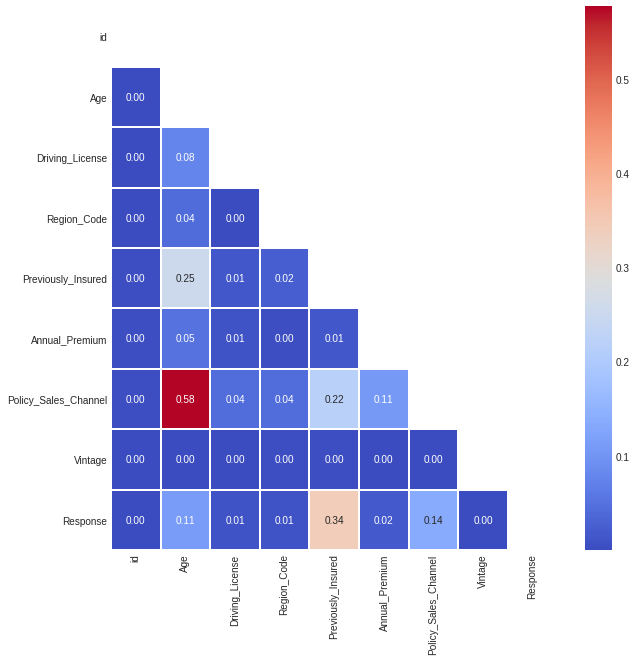

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, mask = mask, cmap = 'coolwarm', annot = True, linewidths = 1, fmt = '.2f')
plt.show()

# To Drop List:
# id
# region_code
# driving_license
# Vintage ?

## Feature Engineering & Selection

In [ ]:
insurance.drop(['id', 'Region_Code','Gender', 'Driving_License', 'Annual_Premium', 'Vintage'], axis = 1, inplace = True)
# nanti coba drop 'Gender', 'Vintage'
# revisi : 'Gender', 'Driving_License', 'Annual_Premium', 'Vintage'

insurance.head()

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,44,0,> 2 Years,Yes,26.0,1
1,76,0,1-2 Year,No,26.0,0
2,47,0,> 2 Years,Yes,26.0,1
3,21,1,< 1 Year,No,152.0,0
4,29,1,< 1 Year,No,152.0,0


## Label Encoding

In [ ]:
insurance['Vehicle_Damage'] = insurance['Vehicle_Damage'].map({
    'Yes' : 1,
    'No' : 0
})

In [ ]:
insurance.head()

,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,44,0,> 2 Years,1,26.0,1
1,76,0,1-2 Year,0,26.0,0
2,47,0,> 2 Years,1,26.0,1
3,21,1,< 1 Year,0,152.0,0
4,29,1,< 1 Year,0,152.0,0


## One Hot Encoding

In [ ]:
# nanti coba drop_first = True

insurance = pd.get_dummies(insurance, columns = ['Vehicle_Age'], drop_first = True)
insurance.head()

,Age,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,0,1,26.0,1,0,1
1,76,0,0,26.0,0,0,0
2,47,0,1,26.0,1,0,1
3,21,1,0,152.0,0,1,0
4,29,1,0,152.0,0,1,0


##Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X = insurance.drop('Response', axis = 1)
y = insurance['Response']

scaler = MinMaxScaler()

In [ ]:
X.head()

,Age,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,0,1,26.0,0,1
1,76,0,0,26.0,0,0
2,47,0,1,26.0,0,1
3,21,1,0,152.0,1,0
4,29,1,0,152.0,1,0


In [ ]:
# X dataset for Tree Algorithms
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=88, 
                                                    stratify = y)

## Balancing the Imbalance Target

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
sm = SMOTE()

In [ ]:
# Handling imbalance target
# For Tree Algorithms

X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


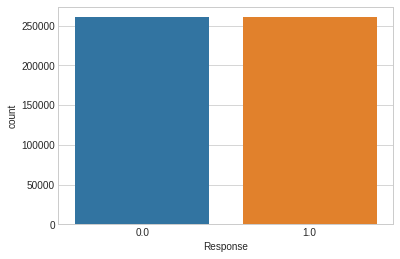

In [ ]:
# For visualization purposes
# non-Scaled data

xsmote = pd.DataFrame(data = X_train_smote, columns = X.columns)
ysmote = pd.DataFrame(data = y_train_smote, columns = ['Response'])
df_smote = pd.concat([xsmote, ysmote])

sns.countplot(df_smote['Response'])

## Scaling for Non-Tree Algorithm

In [ ]:
# For non-Tree Algorithms
# Scaled X dataset

X_train_smotesc = scaler.fit_transform(X_train_smote)
X_test_sc = scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.92329483, -0.95006611,  0.04498255, ..., -1.04800728,
         1.13752034, -0.20582743],
       [ 0.92329483, -0.95006611,  0.04498255, ..., -1.04800728,
         1.13752034, -0.20582743],
       [ 0.92329483, -0.62594325,  0.04498255, ...,  0.95419185,
        -0.87910516, -0.20582743],
       ...,
       [-1.08307765, -0.88524154,  0.04498255, ..., -1.04800728,
         1.13752034, -0.20582743],
       [ 0.92329483,  0.2167762 ,  0.04498255, ...,  0.95419185,
        -0.87910516, -0.20582743],
       [ 0.92329483,  0.54089906,  0.04498255, ...,  0.95419185,
        -0.87910516, -0.20582743]])

# 9) Machine Learning Modelling

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

## Logistic Regression

In [ ]:
print(f"There are {len(y_train_smote[y_train_smote == 1])} in Target '1'.")
print(f"There are {len(y_train_smote[y_train_smote == 0])} in Target '0'.")
print(f"Total rows of the target is {len(y_train_smote)} rows.")

There are 260507 in Target '1'.
There are 260507 in Target '0'.
Total rows of the target is 521014 rows.


In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_smotesc, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred = lr.predict(X_test_sc)

In [ ]:
# print(f"Logistic Regression's TRAINING accuracy: {accuracy_score(y_train_smote, lr.predict(X_train_smote)) : .5f}")
# print(f"Logistic Regression's TESTING accuracy: {accuracy_score(y_test, lr_pred) : .5f}")

acc_logreg = accuracy_score(y_test, lr_pred)
prec_logreg = precision_score(y_test, lr_pred)
rec_logreg = recall_score(y_test, lr_pred)
f1_logreg = f1_score(y_test, lr_pred)

print("\n")
print(classification_report(y_test, lr_pred))

# BEFORE | AFTER DROPPING MANY COLUMNS based on lr.coef_:
  # akurasi = 0.64 | 0.64
  # prec (+) = 0.25 | 0.25
  # rec (+) = 0.97 | 0.97
  # f1s (+) = 0.4 | 0.4



              precision    recall  f1-score   support

           0       0.99      0.61      0.75     65127
           1       0.25      0.94      0.40      9031

    accuracy                           0.65     74158
   macro avg       0.62      0.77      0.57     74158
weighted avg       0.90      0.65      0.71     74158



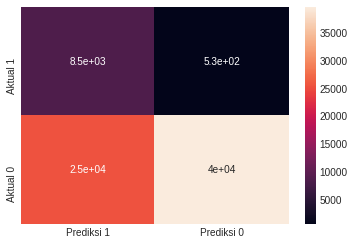

In [ ]:
lr_cmx = confusion_matrix(y_test, lr_pred, labels = [1,0])
lr_cm = pd.DataFrame(data = lr_cmx,  columns = ['Prediksi 1', 'Prediksi 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(lr_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
lr_cm

# Error Type Interpretation on This Dataset:
  # False Negative -- Aktualnya tertarik vehicle insurance, tapi prediksinya engga tertarik
  # False Positive -- Aktualnya tidak tertarik vehicle insurance, tapi prediksinya tertarik

# Lebih baik mana yang diminimalisir?
# Lebih baik FN yg diminimalisir, karena jika ada customer yang tertarik namun tidak di-follow-up,
  # berarti kesempatan perusahaan untuk mendapatkan keuntungan sirna.

,Prediksi 1,Prediksi 0
Aktual 1,8500,531
Aktual 0,25491,39636


In [ ]:
# Finding Features that contribute little to a model

lr_coef = dict(zip(X.columns, abs(lr.coef_[0])))
pd.DataFrame.from_dict(data = lr_coef, orient = 'index', columns=['Coef']).sort_values(by = 'Coef', ascending = False)

# Columns' coef which lower than 0.0xx:
  # 'Gender', 'Driving_License', 'Annual_Premium', 'Vintage'

,Coef
Previously_Insured,3.953328
Vehicle_Damage,2.221764
Age,2.211715
Vehicle_Age_< 1 Year,1.536817
Driving_License,1.291816
Policy_Sales_Channel,0.393783
Vehicle_Age_> 2 Years,0.186959
Annual_Premium,0.141561
Gender,0.126367
Vehicle_Age_1-2 Year,0.043193


## K-Nearast Neighbors

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_smotesc, y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn.predict(X_test_sc)

In [ ]:
# print(f"KNN's TRAINING accuracy: {accuracy_score(y_train, knn.predict(X_train)) : .5f}")
# print(f"KNN's TESTING accuracy: {accuracy_score(y_test, knn_pred) : .5f}")

acc_knn = accuracy_score(y_test, knn_pred)
prec_knn = precision_score(y_test, knn_pred)
rec_knn = recall_score(y_test, knn_pred)
f1_knn = f1_score(y_test, knn_pred)

print("\n")
print(classification_report(y_test, knn_pred))



              precision    recall  f1-score   support

           0       0.92      0.84      0.88     65127
           1       0.30      0.49      0.37      9031

    accuracy                           0.80     74158
   macro avg       0.61      0.67      0.62     74158
weighted avg       0.85      0.80      0.82     74158



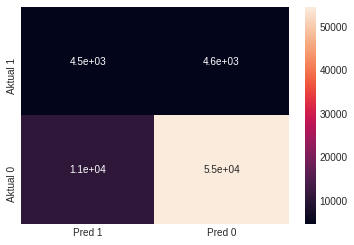

In [ ]:
kn = confusion_matrix(y_test, knn_pred, labels = [1,0])
kn_cm = pd.DataFrame(data = kn,  columns = ['Pred 1', 'Pred 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(kn_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
kn_cm

,Pred 1,Pred 0
Aktual 1,4463,4568
Aktual 0,10619,54508


## Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
# print(f"DTC's TRAINING accuracy: {accuracy_score(y_train, dtc.predict(X_train)) : .5f}")
# print(f"DTC's TESTING accuracy: {accuracy_score(y_test, dtc_pred) : .5f}")

acc_dtc = accuracy_score(y_test, dtc_pred)
prec_dtc = precision_score(y_test, dtc_pred)
rec_dtc = recall_score(y_test, dtc_pred)
f1_dtc = f1_score(y_test, dtc_pred)

print("\n")
print(classification_report(y_test, dtc_pred))



              precision    recall  f1-score   support

           0       0.90      0.90      0.90     65127
           1       0.29      0.30      0.29      9031

    accuracy                           0.83     74158
   macro avg       0.60      0.60      0.60     74158
weighted avg       0.83      0.83      0.83     74158



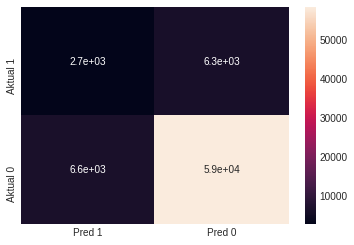

In [ ]:
dt = confusion_matrix(y_test, dtc_pred, labels = [1,0])
dt_cm = pd.DataFrame(data = dt,  columns = ['Pred 1', 'Pred 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(dt_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
dt_cm

,Pred 1,Pred 0
Aktual 1,2690,6341
Aktual 0,6588,58539


## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
# print(f"rfc's TRAINING accuracy: {accuracy_score(y_train, rfc.predict(X_train)) : .5f}")
# print(f"rfc's TESTING accuracy: {accuracy_score(y_test, rfc_pred) : .5f}")

acc_rfc = accuracy_score(y_test, rfc_pred)
prec_rfc = precision_score(y_test, rfc_pred)
rec_rfc = recall_score(y_test, rfc_pred)
f1_rfc = f1_score(y_test, rfc_pred)

print("\n")
print(classification_report(y_test, rfc_pred))



              precision    recall  f1-score   support

           0       0.90      0.93      0.91     65127
           1       0.33      0.25      0.28      9031

    accuracy                           0.85     74158
   macro avg       0.62      0.59      0.60     74158
weighted avg       0.83      0.85      0.84     74158



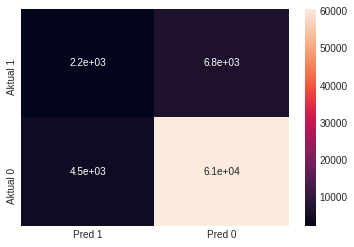

In [ ]:
rf = confusion_matrix(y_test, rfc_pred, labels = [1,0])
rf_cm = pd.DataFrame(data = rf,  columns = ['Pred 1', 'Pred 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(rf_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

## XGradient Boosting

In [ ]:
xgb = GradientBoostingClassifier()

In [ ]:
xgb.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
xgb_pred = xgb.predict(X_test)

In [ ]:
# print(f"xgb's TRAINING accuracy: {accuracy_score(y_train, xgb.predict(X_train)) : .5f}")
# print(f"xgb's TESTING accuracy: {accuracy_score(y_test, xgb_pred) : .5f}")

acc_xgb = accuracy_score(y_test, xgb_pred)
prec_xgb = precision_score(y_test, xgb_pred)
rec_xgb = recall_score(y_test, xgb_pred)
f1_xgb = f1_score(y_test, xgb_pred)

print("\n")
print(classification_report(y_test, xgb_pred))



              precision    recall  f1-score   support

           0       0.95      0.80      0.87     65127
           1       0.32      0.66      0.43      9031

    accuracy                           0.79     74158
   macro avg       0.63      0.73      0.65     74158
weighted avg       0.87      0.79      0.81     74158



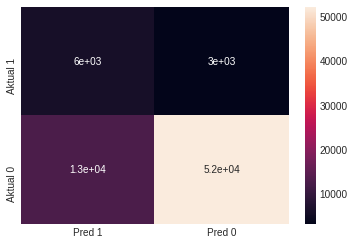

In [ ]:
xg = confusion_matrix(y_test, xgb_pred, labels = [1,0])
xg_cm = pd.DataFrame(data = xg,  columns = ['Pred 1', 'Pred 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(xg_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
xg_cm

,Pred 1,Pred 0
Aktual 1,5988,3043
Aktual 0,12840,52287


## Evaluation Matrix

In [ ]:
eva_met = {
    "LogisticReg": [acc_logreg, prec_logreg, rec_logreg, f1_logreg],
    "KNN": [acc_knn, prec_knn, rec_knn, f1_knn],
    "DecisionTree": [acc_dtc, prec_dtc, rec_dtc, f1_dtc],
    "RandomForest" : [acc_rfc, prec_rfc, rec_rfc, f1_rfc],
    "XtremeGradientBoost": [acc_xgb, prec_xgb, rec_xgb, f1_xgb]
    }

eva = pd.DataFrame(data = eva_met, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva

,LogisticReg,KNN,DecisionTree,RandomForest,XtremeGradientBoost
Accuracy,0.649101,0.795208,0.825656,0.847461,0.785822
Precision,0.250066,0.295916,0.289933,0.331511,0.318037
Recall,0.941203,0.494187,0.297863,0.248477,0.663049
F1-Score,0.395147,0.370174,0.293845,0.284051,0.429879


# 10) Optimization

## Logistic Regression

In [ ]:
print(f"There are {len(y_train_smote[y_train_smote == 1])} in Target '1'.")
print(f"There are {len(y_train_smote[y_train_smote == 0])} in Target '0'.")
print(f"Total rows of the target is {len(y_train_smote)} rows.")

There are 260507 in Target '1'.
There are 260507 in Target '0'.
Total rows of the target is 521014 rows.


In [ ]:
lr_t = LogisticRegression()

param_lr = {
    "penalty": ['l1', 'l2', 'elasticnet'], 
    "C" : [1,2,3,4,5]
}

grid_lr = GridSearchCV(
    estimator = lr_t,
    param_grid = param_lr,
    cv = 10,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [ ]:
grid_lr.fit(X_train_smotesc, y_train_smote)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   52.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
grid_lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [ ]:
lrt_pred = grid_lr.predict(X_test_sc)

In [ ]:
# print(f"Logistic Regression's TRAINING accuracy: {accuracy_score(y_train_smote, lr.predict(X_train_smote)) : .5f}")
# print(f"Logistic Regression's TESTING accuracy: {accuracy_score(y_test, lr_pred) : .5f}")

acc_logregt = accuracy_score(y_test, lrt_pred)
prec_logregt = precision_score(y_test, lrt_pred)
rec_logregt = recall_score(y_test, lrt_pred)
f1_logregt = f1_score(y_test, lrt_pred)

print("\n")
print(classification_report(y_test, lrt_pred))

# BEFORE | AFTER DROPPING MANY COLUMNS based on lr.coef_:
  # akurasi = 0.64 | 0.64
  # prec (+) = 0.25 | 0.25
  # rec (+) = 0.97 | 0.97
  # f1s (+) = 0.4 | 0.4



              precision    recall  f1-score   support

           0       0.99      0.59      0.74     65127
           1       0.25      0.97      0.40      9031

    accuracy                           0.64     74158
   macro avg       0.62      0.78      0.57     74158
weighted avg       0.90      0.64      0.70     74158



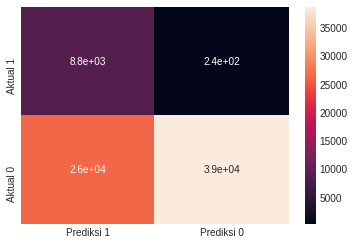

In [ ]:
lrt_cmx = confusion_matrix(y_test, lrt_pred, labels = [1,0])
lrt_cm = pd.DataFrame(data = lrt_cmx,  columns = ['Prediksi 1', 'Prediksi 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(lrt_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
lrt_cm

# Error Type Interpretation on This Dataset:
  # False Negative -- Aktualnya tertarik vehicle insurance, tapi prediksinya engga tertarik
  # False Positive -- Aktualnya tidak tertarik vehicle insurance, tapi prediksinya tertarik

# Lebih baik mana yang diminimalisir?
# Lebih baik FN yg diminimalisir, karena jika ada customer yang tertarik namun tidak di-follow-up,
  # berarti kesempatan perusahaan untuk mendapatkan keuntungan sirna.

,Prediksi 1,Prediksi 0
Aktual 1,8791,240
Aktual 0,26445,38682


In [ ]:
# # Finding Features that contribute little to a model

# lr_coef = dict(zip(X.columns, abs(grid_lr.coef_[0])))
# pd.DataFrame.from_dict(data = lr_coef, orient = 'index', columns=['Coef']).sort_values(by = 'Coef', ascending = False)

# # Columns' coef which lower than 0.0xx:
#   # 'Gender', 'Driving_License', 'Annual_Premium', 'Vintage'

## K-Nearast Neighbors

In [ ]:
knn_t = KNeighborsClassifier()

param_knn = {
    "n_neighbors": [3,7,13],
    "weights": ['uniform', 'distance'],
    "p" : [1,2,3]
}

grid_knn = RandomizedSearchCV(
    estimator = knn_t,
    param_distributions = param_knn,
    cv = 2,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [ ]:
grid_knn.fit(X_train_smotesc, y_train_smote)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 81.6min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 7, 13],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [ ]:
grid_knn.best_params_

{'n_neighbors': 13, 'p': 1, 'weights': 'distance'}

In [ ]:
knnt_pred = grid_knn.predict(X_test_sc)

In [ ]:
# print(f"KNN's TRAINING accuracy: {accuracy_score(y_train, knn.predict(X_train)) : .5f}")
# print(f"KNN's TESTING accuracy: {accuracy_score(y_test, knn_pred) : .5f}")

acc_knnt = accuracy_score(y_test, knnt_pred)
prec_knnt = precision_score(y_test, knnt_pred)
rec_knnt = recall_score(y_test, knnt_pred)
f1_knnt = f1_score(y_test, knnt_pred)

print("\n")
print(classification_report(y_test, knnt_pred))



              precision    recall  f1-score   support

           0       0.95      0.79      0.86     65127
           1       0.31      0.67      0.42      9031

    accuracy                           0.77     74158
   macro avg       0.63      0.73      0.64     74158
weighted avg       0.87      0.77      0.81     74158



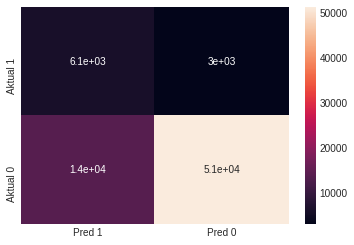

In [ ]:
kn_t = confusion_matrix(y_test, knnt_pred, labels = [1,0])
knt_cm = pd.DataFrame(data = kn_t,  columns = ['Pred 1', 'Pred 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(knt_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
knt_cm

,Pred 1,Pred 0
Aktual 1,6065,2966
Aktual 0,13769,51358


## Decision Tree Classifier

In [ ]:
dtc_t = DecisionTreeClassifier()

param_dtc = {
    "max_depth": [None, 4,9,15,20,50],
    "min_samples_leaf": [0.01, 1,4,10],
    "max_features" : [None, 0.2, 0.8, 2.0],
    "min_samples_split": [2,9,15,25]
}

grid_dtc = RandomizedSearchCV(
    estimator = dtc_t,
    param_distributions = param_dtc,
    cv = 10,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [ ]:
grid_dtc.fit(X_train_smote, y_train_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   31.7s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [ ]:
grid_dtc.best_params_

{'max_depth': 50,
 'max_features': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 9}

In [ ]:
dtct_pred = grid_dtc.predict(X_test)

In [ ]:
# print(f"DTC's TRAINING accuracy: {accuracy_score(y_train, dtc.predict(X_train)) : .5f}")
# print(f"DTC's TESTING accuracy: {accuracy_score(y_test, dtc_pred) : .5f}")

acc_dtct = accuracy_score(y_test, dtct_pred)
prec_dtct = precision_score(y_test, dtct_pred)
rec_dtct = recall_score(y_test, dtct_pred)
f1_dtct = f1_score(y_test, dtct_pred)

print("\n")
print(classification_report(y_test, dtct_pred))



              precision    recall  f1-score   support

           0       0.97      0.70      0.81     65127
           1       0.29      0.87      0.43      9031

    accuracy                           0.72     74158
   macro avg       0.63      0.78      0.62     74158
weighted avg       0.89      0.72      0.77     74158



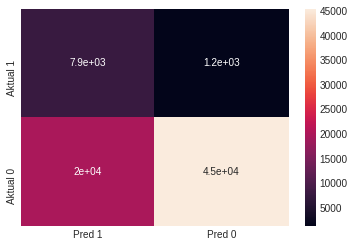

In [ ]:
dtt = confusion_matrix(y_test, dtct_pred, labels = [1,0])
dtt_cm = pd.DataFrame(data = dtt,  columns = ['Pred 1', 'Pred 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(dtt_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
dtt_cm

,Pred 1,Pred 0
Aktual 1,7851,1180
Aktual 0,19689,45438


## Random Forest Classifier

In [ ]:
rfc_t = RandomForestClassifier()

param_rfc = {
    "n_estimators":[100,500,1000],
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [0.06,1,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
    "criterion": ['gini', 'entropy']
}

grid_rfc = RandomizedSearchCV(
    estimator = rfc_t,
    param_distributions = param_rfc,
    cv = 2,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [ ]:
grid_rfc.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 13.5min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rfct_pred = grid_rfc.predict(X_test)

In [ ]:
# print(f"rfc's TRAINING accuracy: {accuracy_score(y_train, rfc.predict(X_train)) : .5f}")
# print(f"rfc's TESTING accuracy: {accuracy_score(y_test, rfc_pred) : .5f}")

acc_rfct = accuracy_score(y_test, rfct_pred)
prec_rfct = precision_score(y_test, rfct_pred)
rec_rfct = recall_score(y_test, rfct_pred)
f1_rfct = f1_score(y_test, rfct_pred)

print("\n")
print(classification_report(y_test, rfct_pred))



              precision    recall  f1-score   support

           0       0.98      0.70      0.81     65127
           1       0.29      0.87      0.43      9031

    accuracy                           0.72     74158
   macro avg       0.63      0.78      0.62     74158
weighted avg       0.89      0.72      0.77     74158



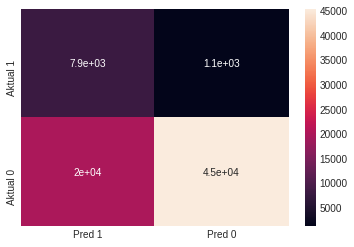

In [ ]:
rft = confusion_matrix(y_test, rfct_pred, labels = [1,0])
rft_cm = pd.DataFrame(data = rft,  columns = ['Pred 1', 'Pred 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(rft_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

## XGradient Boosting

In [ ]:
xgb_t = GradientBoostingClassifier()

param_xgb = {
    "n_estimators":[100, 500, 1000],
    "learning_rate": [0.01, 0.8, 0.9],
    "subsample": [0.01, 0.5, 1.0]
}

grid_xgb = RandomizedSearchCV(
    estimator = xgb_t,
    param_distributions = param_xgb,
    cv = 2,
    scoring = 'accuracy',
    refit = True,
    n_jobs = -1,
    verbose = 1
)

In [ ]:
grid_xgb.fit(X_train_smote, y_train_smote)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 20.8min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [ ]:
grid_xgb.best_params_

{'learning_rate': 0.8, 'n_estimators': 500, 'subsample': 1.0}

In [ ]:
xgbt_pred = grid_xgb.predict(X_test)

In [ ]:
# print(f"xgb's TRAINING accuracy: {accuracy_score(y_train, xgb.predict(X_train)) : .5f}")
# print(f"xgb's TESTING accuracy: {accuracy_score(y_test, xgb_pred) : .5f}")

acc_xgbt = accuracy_score(y_test, xgbt_pred)
prec_xgbt = precision_score(y_test, xgbt_pred)
rec_xgbt = recall_score(y_test, xgbt_pred)
f1_xgbt = f1_score(y_test, xgbt_pred)

print("\n")
print(classification_report(y_test, xgbt_pred))



              precision    recall  f1-score   support

           0       0.98      0.70      0.81     65127
           1       0.29      0.88      0.43      9031

    accuracy                           0.72     74158
   macro avg       0.63      0.79      0.62     74158
weighted avg       0.89      0.72      0.77     74158



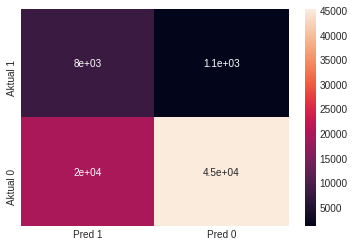

In [ ]:
xgt = confusion_matrix(y_test, xgbt_pred, labels = [1,0])
xgt_cm = pd.DataFrame(data = xgt,  columns = ['Pred 1', 'Pred 0'], index = ['Aktual 1', 'Aktual 0'])
sns.heatmap(xgt_cm, annot = True)
plt.style.use('seaborn-whitegrid')
plt.show()

In [ ]:
xgt_cm

,Pred 1,Pred 0
Aktual 1,7958,1073
Aktual 0,19782,45345


In [ ]:
eva_mat_tuned = {
    "LogisticReg": [acc_logregt, prec_logregt, rec_logregt, f1_logregt],
    "KNN": [acc_knnt, prec_knnt, rec_knnt, f1_knnt],
    "DecisionTree": [acc_dtct, prec_dtct, rec_dtct, f1_dtct],
    "RandomForest" : [acc_rfct, prec_rfct, rec_rfct, f1_rfct],
    "XtremeGradientBoost": [acc_xgbt, prec_xgbt, rec_xgbt, f1_xgbt]
    }

eva_tuned = pd.DataFrame(data = eva_mat_tuned, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva_tuned

,LogisticReg,KNN,DecisionTree,RandomForest,XtremeGradientBoost
Accuracy,0.640160,0.774333,0.718587,0.717765,0.718776
Precision,0.249489,0.305788,0.285076,0.285085,0.286878
Recall,0.973425,0.671576,0.869339,0.873879,0.881187
F1-Score,0.397181,0.420232,0.429357,0.429918,0.432841


# 11) Conclusion
1. **Customers who said no interest, 52% of them are not interested not because they don't want but because they already have.** And Customers who said interested 99.66% of them said they don't have vehicle insurance. This means that we still have a chance that our vehicle insurance still interested by many people. The future is bright!
2. **Customer who has vehicle less than a year, 95.63% of them says no interest for our vehicle insurance.** But wait, 66.3% customer who has vehicle less than a year already has insurance. It means they don't interest not because they don't want but because they already have.
3. **Most customer who has not vehicle insurance, has faced vehicle damage in the past compare to they who don't.** In other hand, most customer who has vehicle insurance, has not faced vehicle damage in the past.
4. **Machine Learning Model can predict whether the customer interested or not with Recall 0.97 of 1.0** using Logistic Regression algorithm that already tuned. Using Recall from evaluation matrix because we want to minimize the False Negative which said customers are interested but we predict they aren't interested. This is dangereous! We could lose our chance to offer our vehicle insurance as well.

#12) Recommendation
1. **Educate more to the people about vehicle insurance.** The market of vehicle insurance is still growing. Most of our customers may not interest not because they don't want it, because they already had.
2. **Eyes on the New Vehicle.** Since we are targetting all customers who have vehicle, how about we divide it by vehicle age. We see that 66.3% customer who has vehicle less than a year already has insurance. The options is two: we could target everyone who has vehicle or the easiest one, people who buy a new car.
3. **Using Machine Learning Model for predicting if they are interested or not.** We could use our model that we built to speed up our sales by predicting the customers if they interested or not. So we can use our energy and time to serve more to customers who interest at our vehicle insurance only.